In [4]:
cd /content/drive/My Drive/Face Emotion Detection

/content/drive/My Drive/Face Emotion Detection


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Conv2D,Flatten,MaxPooling2D

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
features=np.load("images_smile_nuetral.npy")

In [0]:
labels=np.load("labels_smile_nuetral.npy")

In [0]:
from keras.utils.np_utils import to_categorical
labels=to_categorical(labels)

In [10]:
features[1]

array([[[0.3019608 , 0.3019608 , 0.3019608 ],
        [0.30588236, 0.30588236, 0.30588236],
        [0.30980393, 0.30980393, 0.30980393],
        ...,
        [0.2901961 , 0.2901961 , 0.2901961 ],
        [0.3019608 , 0.3019608 , 0.3019608 ],
        [0.29803923, 0.29803923, 0.29803923]],

       [[0.3254902 , 0.3254902 , 0.3254902 ],
        [0.32941177, 0.32941177, 0.32941177],
        [0.32156864, 0.32156864, 0.32156864],
        ...,
        [0.29411766, 0.29411766, 0.29411766],
        [0.30980393, 0.30980393, 0.30980393],
        [0.3019608 , 0.3019608 , 0.3019608 ]],

       [[0.32941177, 0.32941177, 0.32941177],
        [0.34117648, 0.34117648, 0.34117648],
        [0.32941177, 0.32941177, 0.32941177],
        ...,
        [0.2901961 , 0.2901961 , 0.2901961 ],
        [0.30980393, 0.30980393, 0.30980393],
        [0.30980393, 0.30980393, 0.30980393]],

       ...,

       [[0.25490198, 0.25490198, 0.25490198],
        [0.27450982, 0.27450982, 0.27450982],
        [0.25882354, 0

In [11]:
labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=7)

In [24]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(5,5),input_shape=(48,48,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 44, 44, 64)        4864      
_________________________________________________________________
batch_normalization_10 (Batc (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 18, 18, 128)       204928    
_________________________________________________________________
batch_normalization_11 (Batc (None, 18, 18, 128)       512       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 256)        

In [0]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [27]:
model.fit(feature_train,label_train, 
            epochs=20, 
            verbose=1, 
            validation_data=(feature_test,label_test),
            shuffle=True,
)

Train on 12149 samples, validate on 3038 samples
Epoch 1/20
12149/12149 [==============================] - 5s 388us/step - loss: 0.0428 - accuracy: 0.9853 - val_loss: 1.5230 - val_accuracy: 0.7303
Epoch 2/20
12149/12149 [==============================] - 5s 389us/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.7226 - val_accuracy: 0.8407
Epoch 3/20
12149/12149 [==============================] - 5s 385us/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.9163 - val_accuracy: 0.8547
Epoch 4/20
12149/12149 [==============================] - 5s 387us/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.9664 - val_accuracy: 0.8520
Epoch 5/20
12149/12149 [==============================] - 5s 388us/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.9772 - val_accuracy: 0.8563
Epoch 6/20
12149/12149 [==============================] - 5s 390us/step - loss: 0.0405 - accuracy: 0.9869 - val_loss: 0.9652 - val_accuracy: 0.7768
Epoch 7/20
12149/12149 [==============================] - 5s 38

In [29]:
model.predict(feature_test)

array([[4.2395601e-12, 1.0000000e+00],
       [6.1178284e-06, 9.9999344e-01],
       [5.0480291e-04, 9.9945515e-01],
       ...,
       [3.0331360e-21, 1.0000000e+00],
       [5.7739187e-05, 9.9993742e-01],
       [9.9869746e-01, 1.4991531e-03]], dtype=float32)

In [30]:
model.evaluate(feature_test,label_test)


3038/3038 [==============================] - 0s 138us/step


[0.9430748739275515, 0.8581303358078003]

In [0]:
img=plt.imread("PM_Modi_2015.jpg")
img=cv2.resize(img,(48,48))
img=img/255


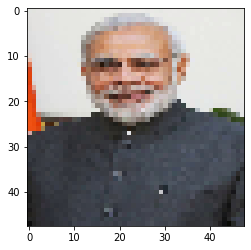

In [43]:
plt.imshow(img)

In [0]:
img=np.expand_dims(img,axis=0)

In [45]:
model.predict(img)

array([[6.1527275e-13, 1.0000000e+00]], dtype=float32)

In [0]:
img=plt.imread("download.jfif")
img=cv2.resize(img,(48,48))
img=img/255


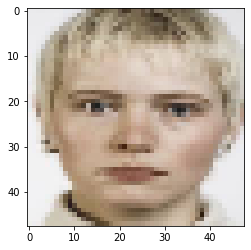

In [48]:
plt.imshow(img)

In [0]:
img=np.expand_dims(img,axis=0)

In [50]:
model.predict(img)

array([[1.000000e+00, 4.794776e-09]], dtype=float32)